# Automatic bad quality image filtering (tryouts)

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
from datetime import datetime
from glob import glob
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Project
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname('.')), '..', 'common'))

import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

In [3]:
import cv2

In [157]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    #
    # credits to http://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/
    return cv2.Laplacian(image, cv2.CV_64F, ksize=17).std()

In [5]:
from data_utils import RESOURCES_PATH, GENERATED_DATA, get_annotations
from data_utils import get_id_type_list_from_annotations
from image_utils import get_image_data

In [21]:
sloth_annotations_filename = os.path.join(RESOURCES_PATH, 'cervix_os.json')
annotations = get_annotations(sloth_annotations_filename)
print("Number of hand-made annotations: ", len(annotations))

('Number of hand-made annotations: ', 4483)


In [26]:
trainval_id_type_list = get_id_type_list_from_annotations(annotations, select=['os', 'cervix', 'ok'])
bad_id_type_list = get_id_type_list_from_annotations(annotations, select=['to_remove', ])
len(trainval_id_type_list), len(bad_id_type_list) 

(2839, 1644)

In [27]:
## Remove green imagery
from data_utils import remove_green_imagery
trainval_id_type_list = remove_green_imagery(trainval_id_type_list)

In [28]:
len(trainval_id_type_list), len(bad_id_type_list) 

(2821, 1644)

In [25]:
from data_utils import compute_type_distribution
compute_type_distribution(np.array(trainval_id_type_list))

[0.3282523927685218, 0.33002481389578164, 0.34172279333569655]

In [53]:
def patch_iterator(img, nx, ny):
    h, w, c = img.shape
    
    def _get_size_f(size, n):
        return size * 1.0/n

    def _get_size(size, n):
        return int(np.ceil(_get_size_f(size, n)))
    
    txf = _get_size_f(w, nx)
    tyf = _get_size_f(h, ny)    
    tx = _get_size(w, nx)
    ty = _get_size(h, ny)    
    for j in range(ny):
        yo = int( j * tyf ) 
        for i in range(nx):
            xo = int( i * txf )            
            yield xo, yo, img[yo:yo+ty, xo:xo+tx]

In [153]:
index = 5
key = bad_id_type_list[index]
img = get_image_data(*key)

img = cv2.resize(img, dsize=(256, 256))

In [154]:
# v = []
# for xo, yo, p in patch_iterator(img, 4, 4):
#     v.append(((xo, yo), p.shape[:2][::-1], variance_of_laplacian(p))
# v

In [155]:
from image_utils import scale_percentile

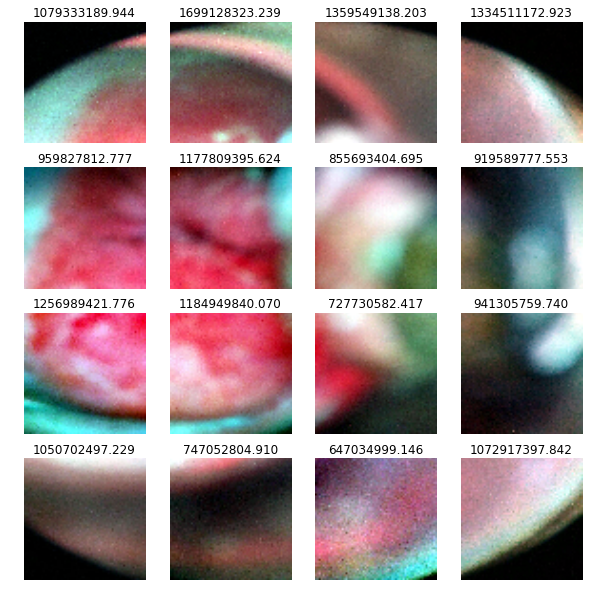

In [158]:
plt_st(10, 10)
counter = 0
for xo, yo, p in patch_iterator(img, 4, 4):
    w = variance_of_laplacian(p)
#     v = p1.var()
#     p2 = cv2.Laplacian(p1, cv2.CV_64F)
#     p1 = cv2.cvtColor(p, cv2.COLOR_RGB2GRAY)
#     p1 = cv2.Laplacian(p1, cv2.CV_8U)
#     p2 = cv2.Scharr(p1, cv2.CV_8U, 1, 0)
#     p3 = cv2.Scharr(p1, cv2.CV_8U, 0, 1)    
#     p1 = cv2.addWeighted(np.absolute(p2), 0.5, np.absolute(p3), 0.5, 0)
#     print p1.shape
    counter += 1 
    plt.subplot(4, 4, counter)
    plt.title("%.3f" % w)
    plt.imshow(scale_percentile(p))    
    plt.axis('off')

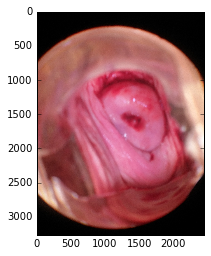

In [33]:
plt_st(10, 4)
plt.imshow(img)

In [ ]:
from xy_providers import DataCache
try:
    if cache is None:
        cache = DataCache(0)
except NameError:
    cache = DataCache(0)

In [43]:
blur_values = []
ll = len(trainval_id_type_list)
for i, key in enumerate(trainval_id_type_list):
    print("-- %i / %i" % (i, ll))
    v = variance_of_laplacian(get_image_data(*key, cache=cache))
    blur_values.append(v)

-- 0 / 2048
-- 1 / 2048
-- 2 / 2048
-- 3 / 2048
-- 4 / 2048
-- 5 / 2048
-- 6 / 2048
-- 7 / 2048
-- 8 / 2048
-- 9 / 2048
-- 10 / 2048
-- 11 / 2048
-- 12 / 2048
-- 13 / 2048
-- 14 / 2048
-- 15 / 2048
-- 16 / 2048
-- 17 / 2048
-- 18 / 2048
-- 19 / 2048
-- 20 / 2048
-- 21 / 2048
-- 22 / 2048
-- 23 / 2048
-- 24 / 2048
-- 25 / 2048
-- 26 / 2048
-- 27 / 2048
-- 28 / 2048
-- 29 / 2048
-- 30 / 2048
-- 31 / 2048
-- 32 / 2048
-- 33 / 2048
-- 34 / 2048
-- 35 / 2048
-- 36 / 2048
-- 37 / 2048
-- 38 / 2048
-- 39 / 2048
-- 40 / 2048
-- 41 / 2048
-- 42 / 2048
-- 43 / 2048
-- 44 / 2048
-- 45 / 2048
-- 46 / 2048
-- 47 / 2048
-- 48 / 2048
-- 49 / 2048
-- 50 / 2048
-- 51 / 2048
-- 52 / 2048
-- 53 / 2048
-- 54 / 2048
-- 55 / 2048
-- 56 / 2048
-- 57 / 2048
-- 58 / 2048
-- 59 / 2048
-- 60 / 2048
-- 61 / 2048
-- 62 / 2048
-- 63 / 2048
-- 64 / 2048
-- 65 / 2048
-- 66 / 2048
-- 67 / 2048
-- 68 / 2048
-- 69 / 2048
-- 70 / 2048
-- 71 / 2048
-- 72 / 2048
-- 73 / 2048
-- 74 / 2048
-- 75 / 2048
-- 76 / 2048
-- 77 / 2

KeyboardInterrupt: 

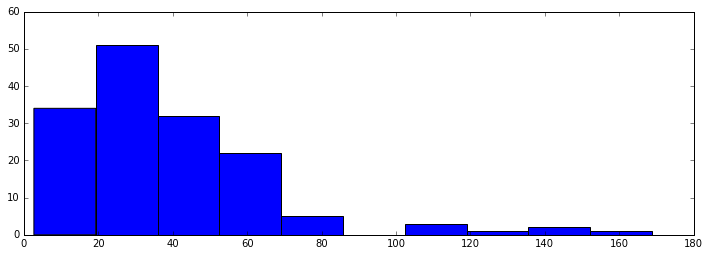

In [44]:
plt_st(12, 4)
_ = plt.hist(blur_values)

In [38]:
blur_values_2 = []
ll = len(bad_id_type_list)
for i, key in enumerate(bad_id_type_list):
    print("-- %i / %i" % (i, ll))
    if key[0] == '1339':
        continue
    v = variance_of_laplacian(get_image_data(*key, cache=cache))
    blur_values_2.append(v)

-- 0 / 881
-- 1 / 881
-- 2 / 881
-- 3 / 881
-- 4 / 881
-- 5 / 881
-- 6 / 881
-- 7 / 881
-- 8 / 881
-- 9 / 881
-- 10 / 881
-- 11 / 881
-- 12 / 881
-- 13 / 881
-- 14 / 881
-- 15 / 881
-- 16 / 881
-- 17 / 881
-- 18 / 881
-- 19 / 881
-- 20 / 881
-- 21 / 881
-- 22 / 881
-- 23 / 881
-- 24 / 881
-- 25 / 881
-- 26 / 881
-- 27 / 881
-- 28 / 881
-- 29 / 881
-- 30 / 881
-- 31 / 881
-- 32 / 881
-- 33 / 881
-- 34 / 881
-- 35 / 881
-- 36 / 881
-- 37 / 881
-- 38 / 881
-- 39 / 881
-- 40 / 881
-- 41 / 881
-- 42 / 881
-- 43 / 881
-- 44 / 881
-- 45 / 881
-- 46 / 881
-- 47 / 881
-- 48 / 881
-- 49 / 881
-- 50 / 881
-- 51 / 881
-- 52 / 881
-- 53 / 881
-- 54 / 881
-- 55 / 881
-- 56 / 881
-- 57 / 881
-- 58 / 881
-- 59 / 881
-- 60 / 881
-- 61 / 881
-- 62 / 881
-- 63 / 881
-- 64 / 881
-- 65 / 881
-- 66 / 881
-- 67 / 881
-- 68 / 881
-- 69 / 881
-- 70 / 881
-- 71 / 881
-- 72 / 881
-- 73 / 881
-- 74 / 881
-- 75 / 881
-- 76 / 881
-- 77 / 881
-- 78 / 881
-- 79 / 881
-- 80 / 881
-- 81 / 881
-- 82 / 881
-- 83 / 881
--

KeyboardInterrupt: 

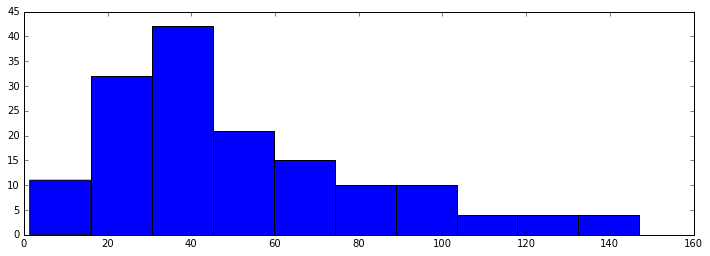

In [39]:
plt_st(12, 4)
_ = plt.hist(blur_values_2)

In [50]:
tile_size = (256, 256)
n = 15

complete_images = []
for k, id_type_list in enumerate([trainval_id_type_list[:100], bad_id_type_list[:100]]):
    m = int(np.ceil(len(id_type_list) * 1.0 / n))
    complete_image = np.zeros((m*(tile_size[0]+2), n*(tile_size[1]+2), 3), dtype=np.uint8)
    counter = 0
    for i in range(m):
        ys = i*(tile_size[1] + 2)
        ye = ys + tile_size[1]
        for j in range(n):
            xs = j*(tile_size[0] + 2)
            xe = xs + tile_size[0]
            if counter == len(id_type_list):
                break
            image_id, image_type = id_type_list[counter]; counter+=1
            img = get_image_data(image_id, image_type, cache=cache)
            if img.dtype.kind != 'u':
                print("Corrupted image: ", image_id, 'Type_%i' % (k+1))
                continue
            v = variance_of_laplacian(img)
            img = cv2.resize(img, dsize=tile_size)
            img = cv2.putText(img, "%.2f" % v, (5,img.shape[0] - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.75, (255, 255, 255), thickness=3)
            complete_image[ys:ye, xs:xe, :] = img[:,:,:]
        if counter == len(id_type_list):
            break
    complete_images.append(complete_image)           

('Corrupted image: ', u'1339', 'Type_2')


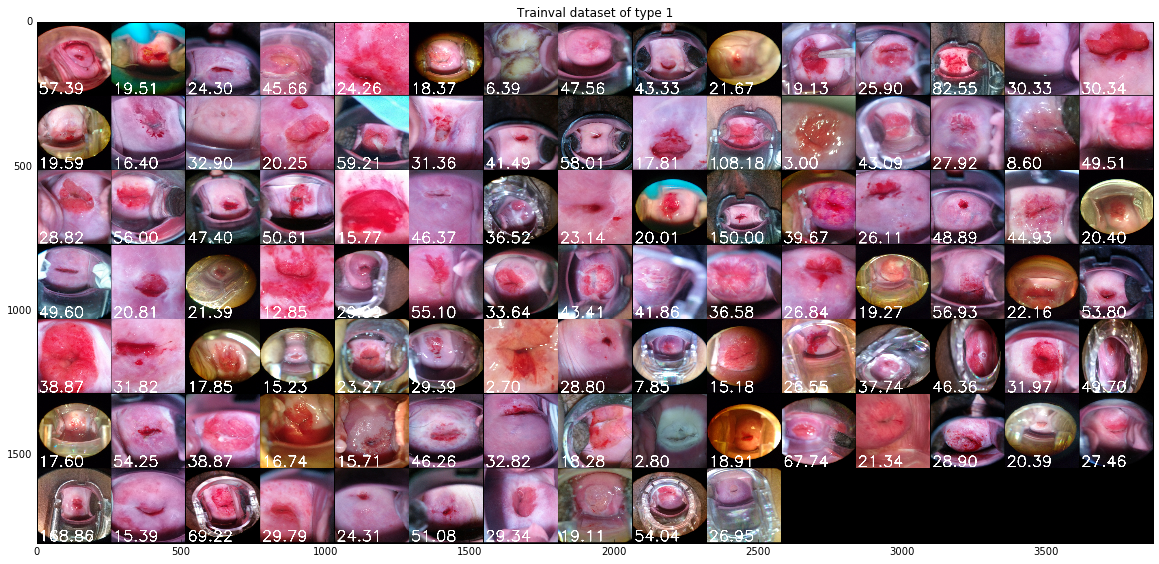

In [51]:
plt_st(20, 20)
plt.imshow(complete_images[0])
plt.title("Trainval dataset of type %i" % (1))

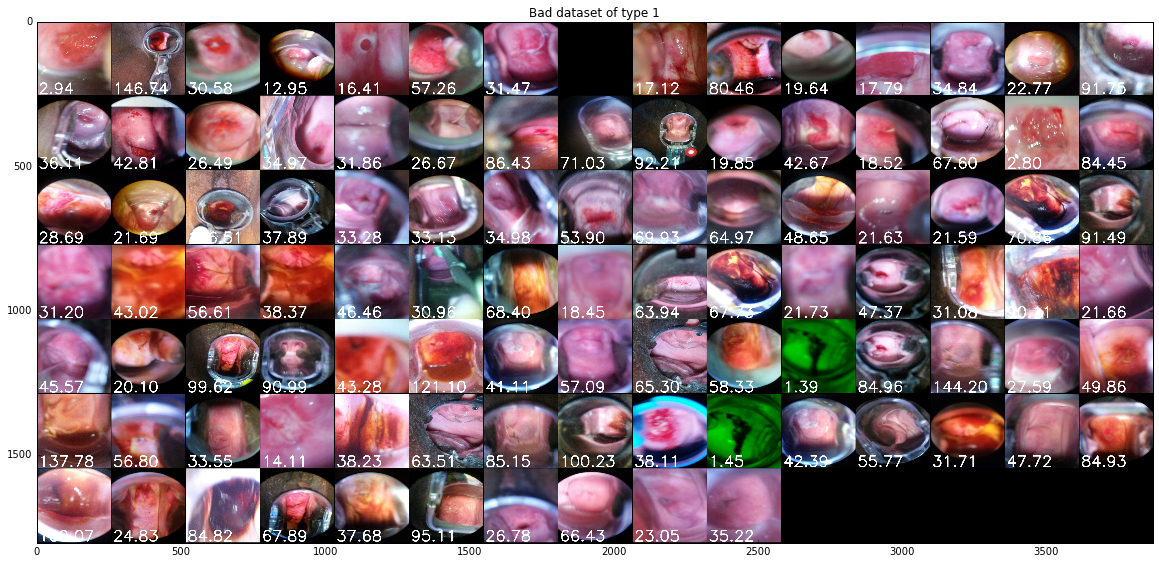

In [52]:
plt_st(20, 20)
plt.imshow(complete_images[1])
plt.title("Bad dataset of type %i" % (1))

# Data augmentation: brightness, colors

In [208]:
from image_utils import scale_percentile

In [209]:
ll = len(trainval_id_type_list)
index = np.random.randint(ll)
key = trainval_id_type_list[index]
img = get_image_data(*key, cache=cache)

image_size = (299, 299)
img = cv2.resize(img, dsize=image_size[::-1])
img = img.transpose([2, 0, 1])
img = img.astype(np.float32) / 255.0

In [220]:
def more_blue(img, b=0, channels_first=False):
    out = img.copy()
    f1 = np.random.rand() * 0.05 + 0.6
    f2 = np.random.rand() * 0.05 + 0.7
    if channels_first:
        out[2,:,:] = np.clip(img[2,:,:] * 1.15 + b, 0, 1.0)
        out[0,:,:] = np.clip(img[0,:,:] * f1 + b, 0, 1.0)    
        out[1,:,:] = np.clip(img[1,:,:] * f2 + b, 0, 1.0)    
    else:        
        out[:,:,2] = np.clip(img[:,:,2] * 1.15 + b, 0, 1.0)
        out[:,:,0] = np.clip(img[:,:,0] * f1 + b, 0, 1.0)    
        out[:,:,1] = np.clip(img[:,:,1] * f2 + b, 0, 1.0)    
    return out

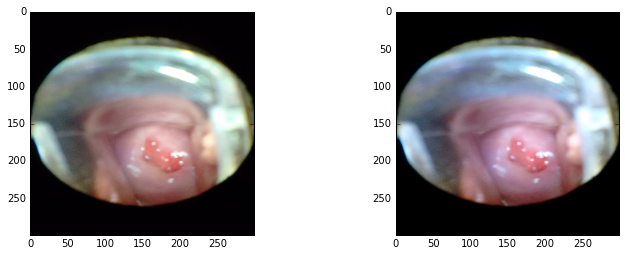

In [241]:
proc = more_blue(img, b=np.random.randint(-50, 120) * 1.0/255.0, channels_first=True)

plt_st(12, 4)
plt.subplot(121)
plt.imshow(scale_percentile(img.transpose((1, 2, 0))))
plt.subplot(122)
plt.imshow(scale_percentile(proc.transpose((1, 2, 0))))

In [222]:
def more_yellow(img, b=0, channels_first=False):
    out = img.copy()
    f1 = np.random.rand() * 0.15 + 0.6
    f2 = np.random.rand() * 0.05 + 0.15
    if channels_first:
        out[0,:,:] = np.clip(img[0,:,:] * 1.05 + b, 0, 1.0)
        out[1,:,:] = np.clip(img[1,:,:] * f1 + b, 0, 1.0)    
        out[2,:,:] = np.clip(img[2,:,:] * f2 + b, 0, 1.0)    
    else:
        out[:,:,0] = np.clip(img[:,:,0] * 1.05 + b, 0, 1.0)
        out[:,:,1] = np.clip(img[:,:,1] * f1 + b, 0, 1.0)    
        out[:,:,2] = np.clip(img[:,:,2] * f2 + b, 0, 1.0)    
    return out

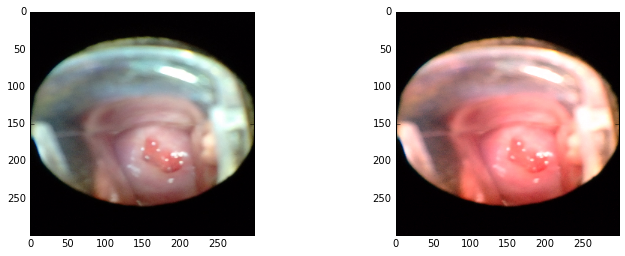

In [233]:
proc = more_yellow(img, b=np.random.randint(-50, 120) * 1.0/255.0, channels_first=True)

plt_st(12, 4)
plt.subplot(121)
plt.imshow(scale_percentile(img.transpose((1, 2, 0))))
plt.subplot(122)
plt.imshow(scale_percentile(proc.transpose((1, 2, 0))))